In [1]:
ls

aaa.png                     SPI_1mon.csv
SPEI_1mon.csv               SPI_1mon_rainy_season.csv
SPEI_1mon_rainy_season.csv  SPI_3mon.csv
SPEI_3mon.csv               SPI_3mon_rainy_season.csv
SPEI_3mon_rainy_season.csv  Untitled.ipynb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

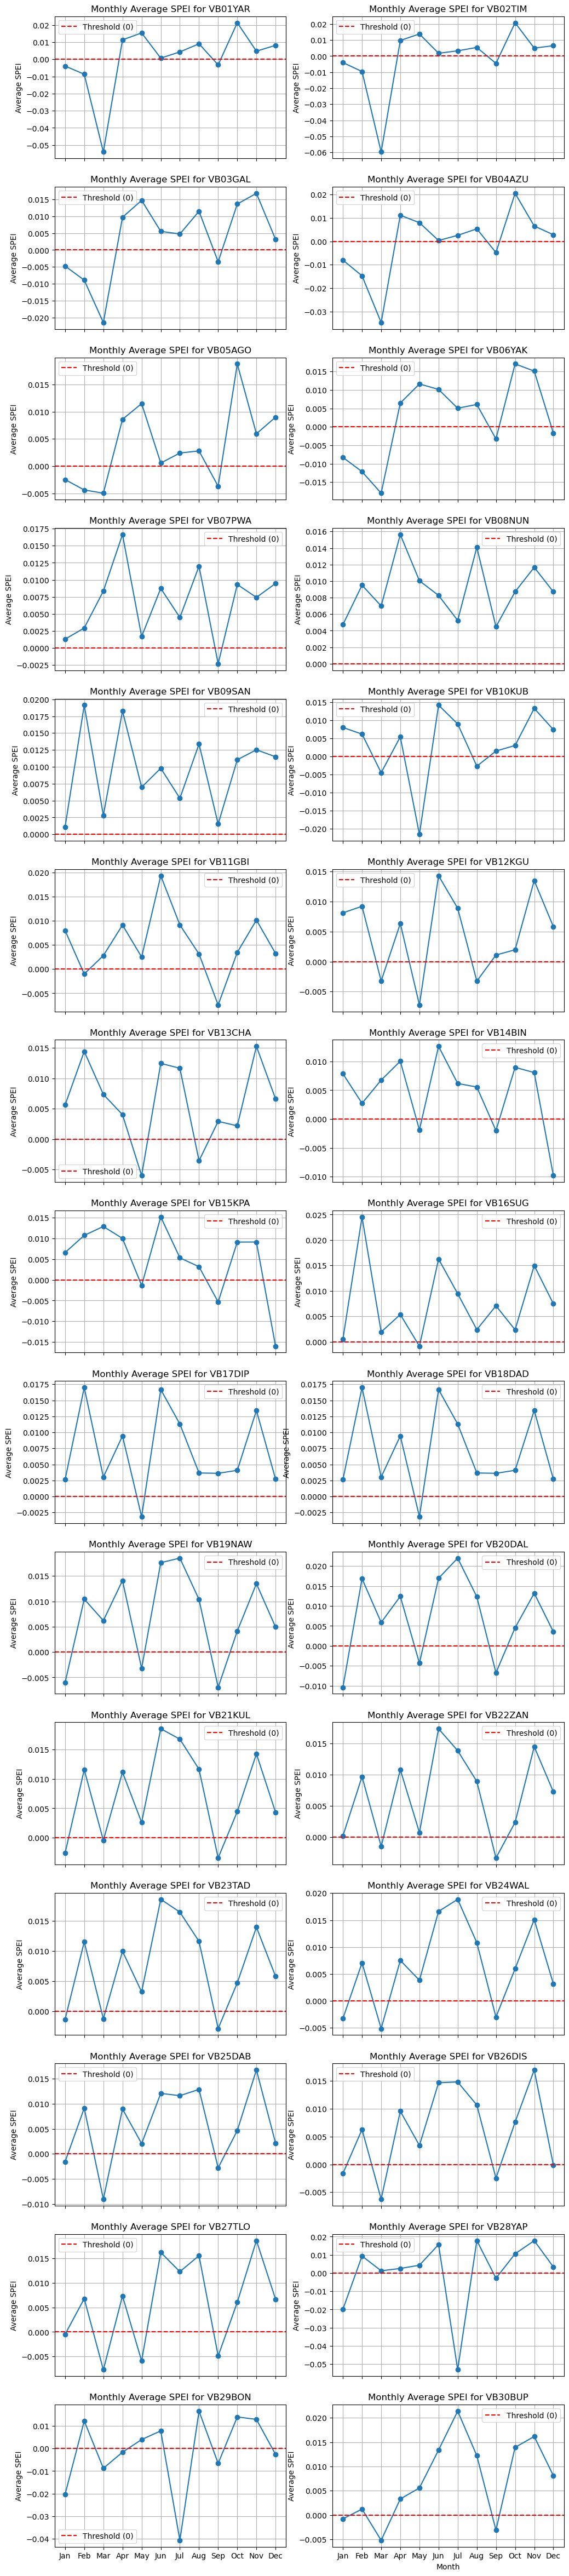

In [9]:

a = pd.read_csv('SPEI_1mon.csv')
a = a[2:].reset_index(drop=True)
a.rename(columns={a.columns[0]: 'DATE'}, inplace=True)
a['DATE'] = pd.to_datetime(a['DATE'], format='%Y%m')
a['Year'] = a['DATE'].dt.year
a['Month'] = a['DATE'].dt.month


location_columns = a.columns[1:31]
num_locations = len(location_columns)
num_cols = 2
num_rows = (num_locations + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)

axes = axes.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, location in enumerate(location_columns):
    monthly_average = a.groupby(['Month'])[location].mean()
    axes[i].plot(month_names, monthly_average.values, marker='o') 
    axes[i].axhline(y=0, color='r', linestyle='--', label='Threshold (0)')
    axes[i].set_ylabel('Average SPEI')
    axes[i].set_title(f'Monthly Average SPEI for {location}')
    axes[i].legend()
    axes[i].grid()
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Set common x-label
axes[-1].set_xlabel('Month')
plt.savefig('aaa.png')
plt.show()

In [5]:
location_columns = a.columns[1:31]
location_columns

Index(['VB01YAR', 'VB02TIM', 'VB03GAL', 'VB04AZU', 'VB05AGO', 'VB06YAK',
       'VB07PWA', 'VB08NUN', 'VB09SAN', 'VB10KUB', 'VB11GBI', 'VB12KGU',
       'VB13CHA', 'VB14BIN', 'VB15KPA', 'VB16SUG', 'VB17DIP', 'VB18DAD',
       'VB19NAW', 'VB20DAL', 'VB21KUL', 'VB22ZAN', 'VB23TAD', 'VB24WAL',
       'VB25DAB', 'VB26DIS', 'VB27TLO', 'VB28YAP', 'VB29BON', 'VB30BUP'],
      dtype='object')

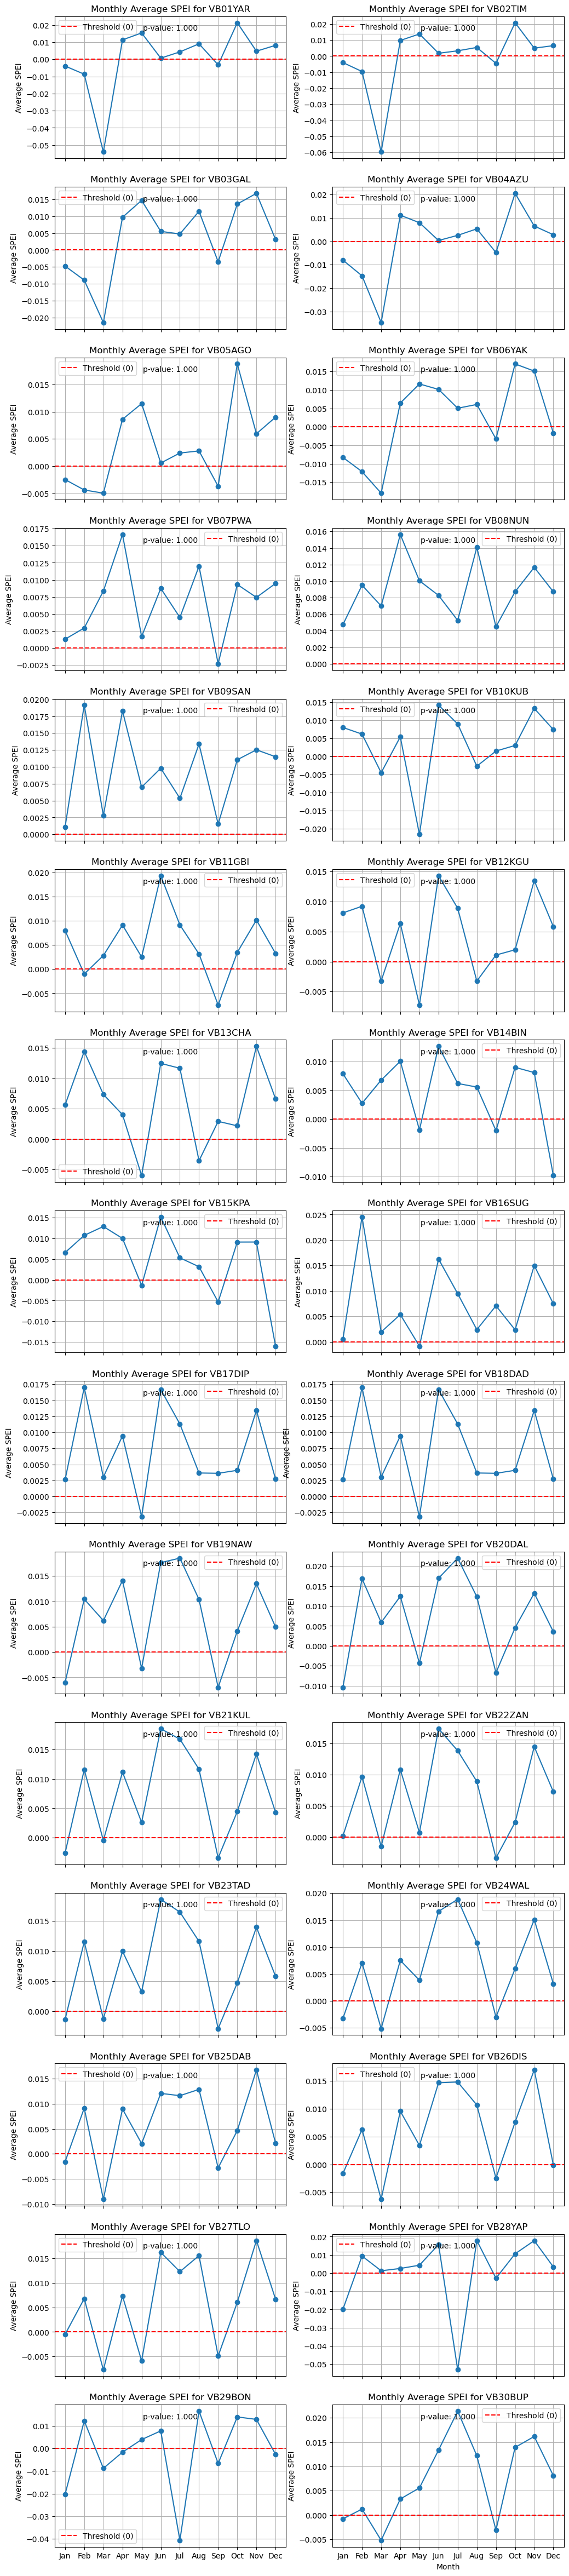

In [6]:

a = pd.read_csv('SPEI_1mon.csv')
a = a[2:].reset_index(drop=True)
a.rename(columns={a.columns[0]: 'DATE'}, inplace=True)
a['DATE'] = pd.to_datetime(a['DATE'], format='%Y%m')
a['Year'] = a['DATE'].dt.year
a['Month'] = a['DATE'].dt.month

location_columns = a.columns[1:31]
num_locations = len(location_columns)
num_cols = 2
num_rows = (num_locations + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)

axes = axes.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p_values = []

for i, location in enumerate(location_columns):
    monthly_average = a.groupby(['Month'])[location].mean()
    axes[i].plot(month_names, monthly_average.values, marker='o') 
    axes[i].axhline(y=0, color='r', linestyle='--', label='Threshold (0)')
    axes[i].set_ylabel('Average SPEI')
    axes[i].set_title(f'Monthly Average SPEI for {location}')
    axes[i].legend()
    axes[i].grid()
    f_val, p_val = stats.f_oneway(*[group[location].values for name, group in a.groupby('Month')])
    p_values.append(p_val)

    axes[i].text(0.5, 0.9, f'p-value: {p_val:.3f}', transform=axes[i].transAxes, ha='center', fontsize=10)

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

axes[-1].set_xlabel('Month')
plt.savefig('aaa.png')
plt.show()


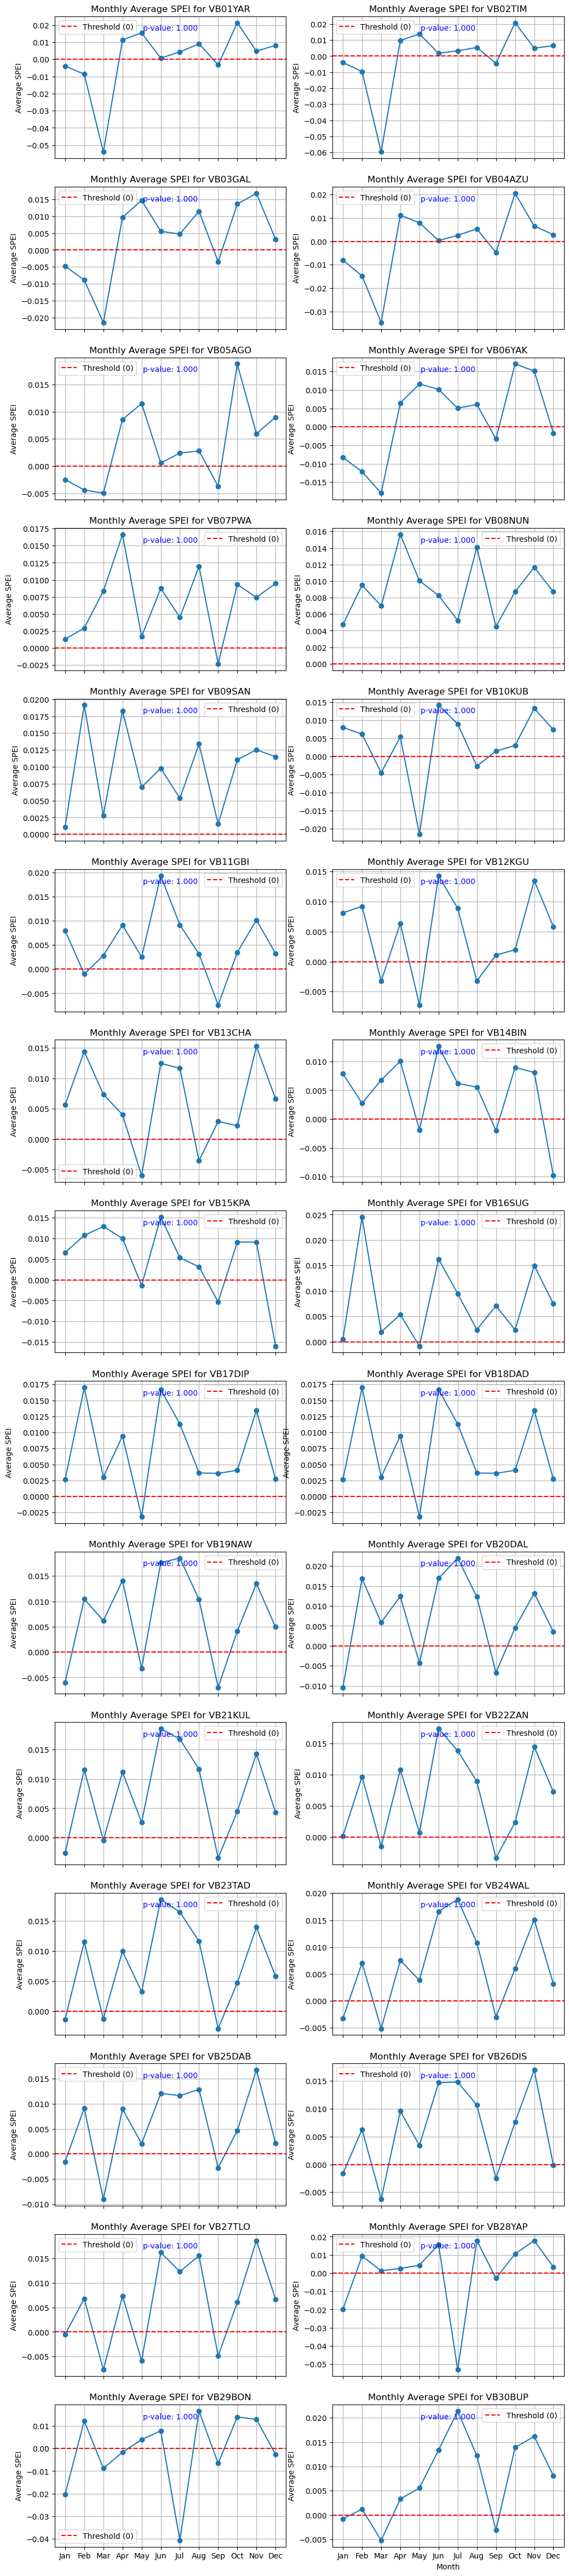

In [7]:


a = pd.read_csv('SPEI_1mon.csv')
a = a[2:].reset_index(drop=True)
a.rename(columns={a.columns[0]: 'DATE'}, inplace=True)
a['DATE'] = pd.to_datetime(a['DATE'], format='%Y%m')
a['Year'] = a['DATE'].dt.year
a['Month'] = a['DATE'].dt.month

location_columns = a.columns[1:31]
num_locations = len(location_columns)
num_cols = 2
num_rows = (num_locations + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)

axes = axes.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, location in enumerate(location_columns):
    monthly_average = a.groupby(['Month'])[location].mean()
    axes[i].plot(month_names, monthly_average.values, marker='o') 
    axes[i].axhline(y=0, color='r', linestyle='--', label='Threshold (0)')
    axes[i].set_ylabel('Average SPEI')
    axes[i].set_title(f'Monthly Average SPEI for {location}')
    axes[i].legend()
    axes[i].grid()

    f_val, p_val = stats.f_oneway(*[group[location].values for name, group in a.groupby('Month')])

    axes[i].text(0.5, 0.9, f'p-value: {p_val:.3f}', transform=axes[i].transAxes, ha='center', fontsize=10, color='blue')

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

axes[-1].set_xlabel('Month')
plt.savefig('aaa.png')
plt.show()


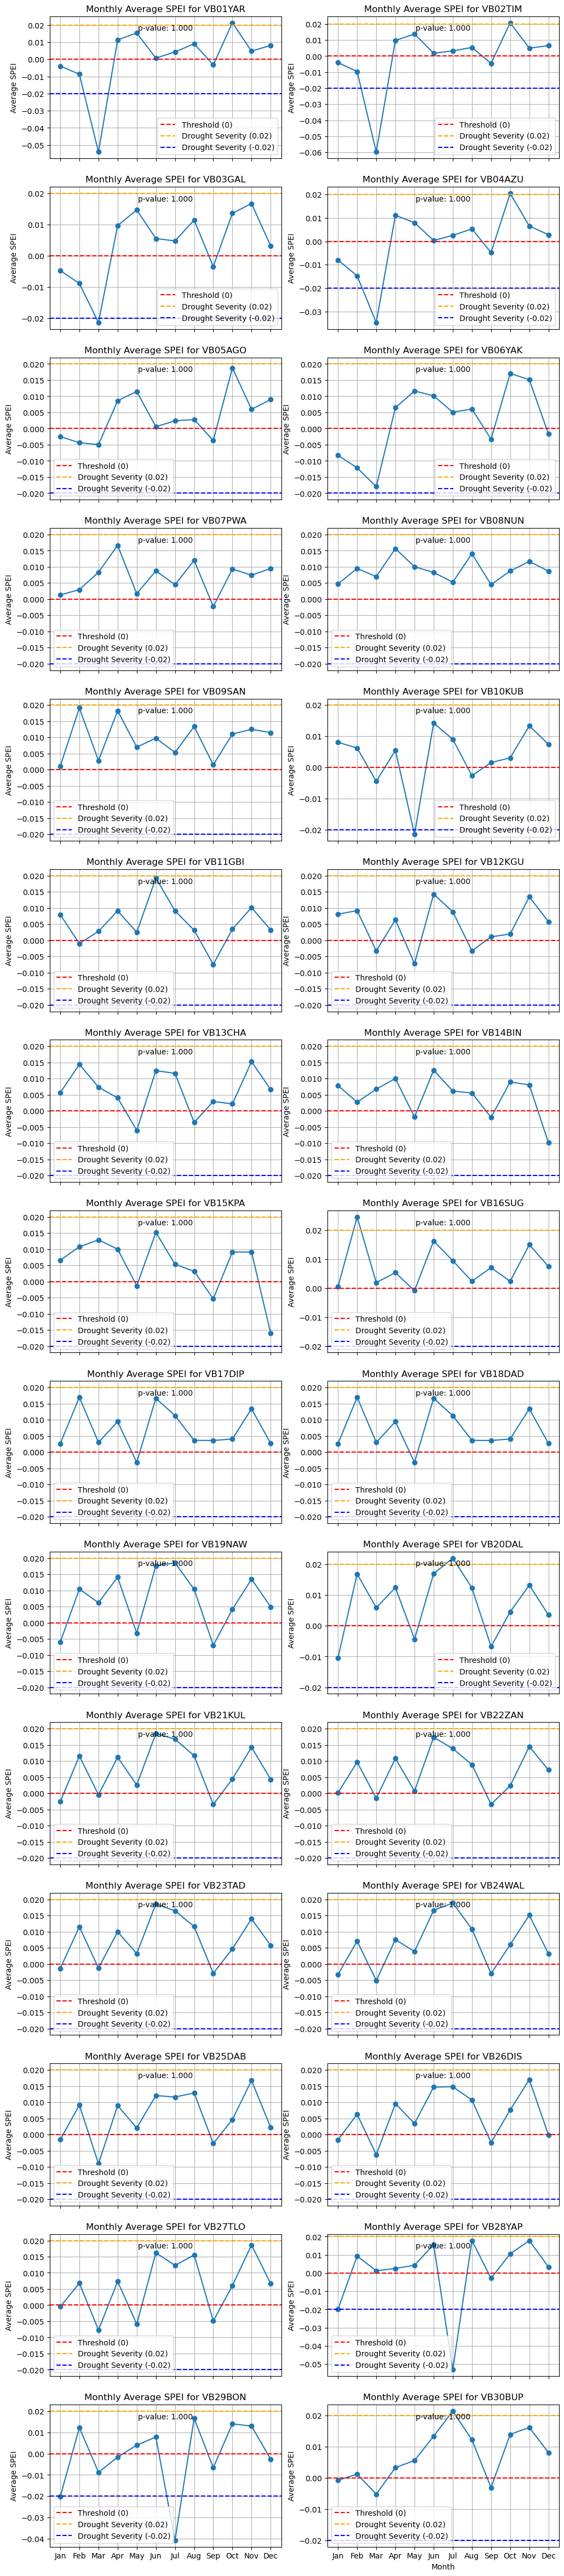

In [1]:

a = pd.read_csv('SPEI_1mon.csv')
a = a[2:].reset_index(drop=True)
a.rename(columns={a.columns[0]: 'DATE'}, inplace=True)
a['DATE'] = pd.to_datetime(a['DATE'], format='%Y%m')
a['Year'] = a['DATE'].dt.year
a['Month'] = a['DATE'].dt.month

location_columns = a.columns[1:31]
num_locations = len(location_columns)
num_cols = 2
num_rows = (num_locations + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)

axes = axes.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


p_values = []

for i, location in enumerate(location_columns):
    monthly_average = a.groupby(['Month'])[location].mean()
    axes[i].plot(month_names, monthly_average.values, marker='o') 
    axes[i].axhline(y=0, color='r', linestyle='--', label='Threshold (0)')
    axes[i].axhline(y=0.02, color='orange', linestyle='--', label='Drought Severity (0.02)')
    axes[i].axhline(y=-0.02, color='blue', linestyle='--', label='Drought Severity (-0.02)')
    axes[i].set_ylabel('Average SPEI')
    axes[i].set_title(f'Monthly Average SPEI for {location}')
    axes[i].legend()
    axes[i].grid()
    f_val, p_val = stats.f_oneway(*[group[location].values for name, group in a.groupby('Month')])
    p_values.append(p_val)

    axes[i].text(0.5, 0.9, f'p-value: {p_val:.3f}', transform=axes[i].transAxes, ha='center', fontsize=10)

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

axes[-1].set_xlabel('Month')
plt.savefig('aaa.png',dpi=500)
plt.show()


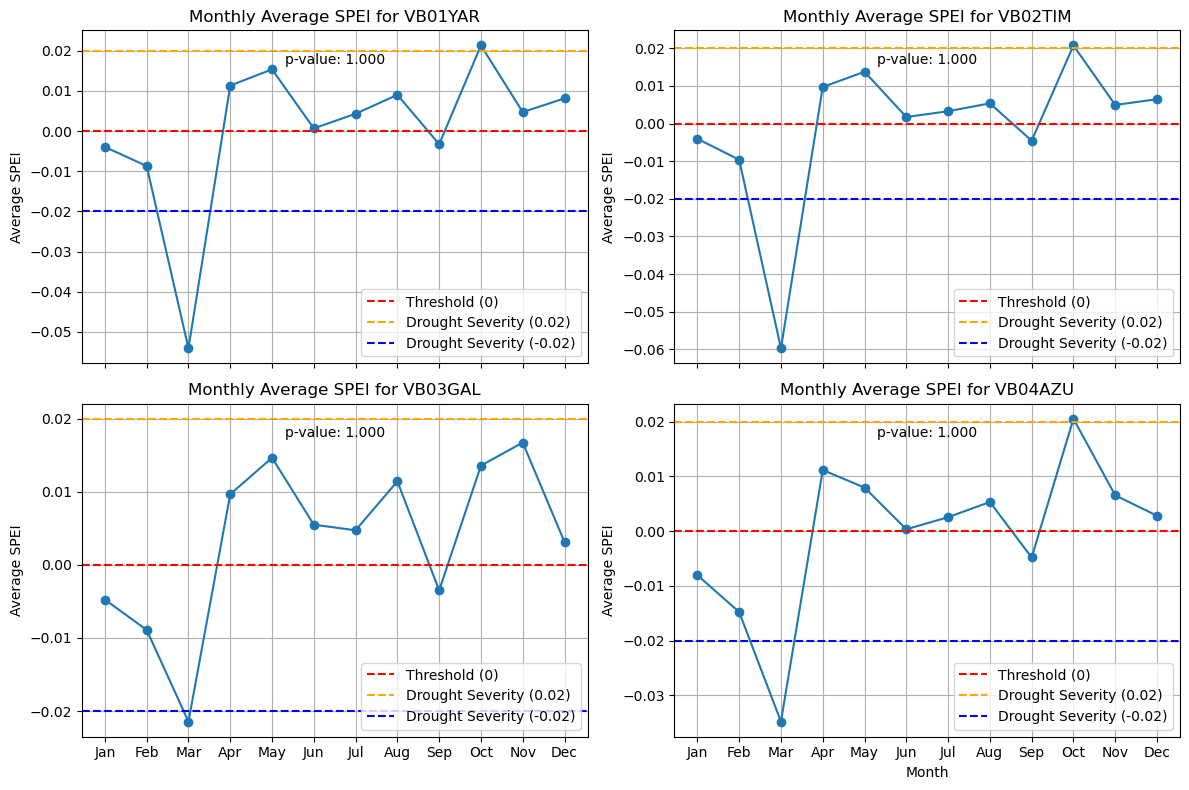

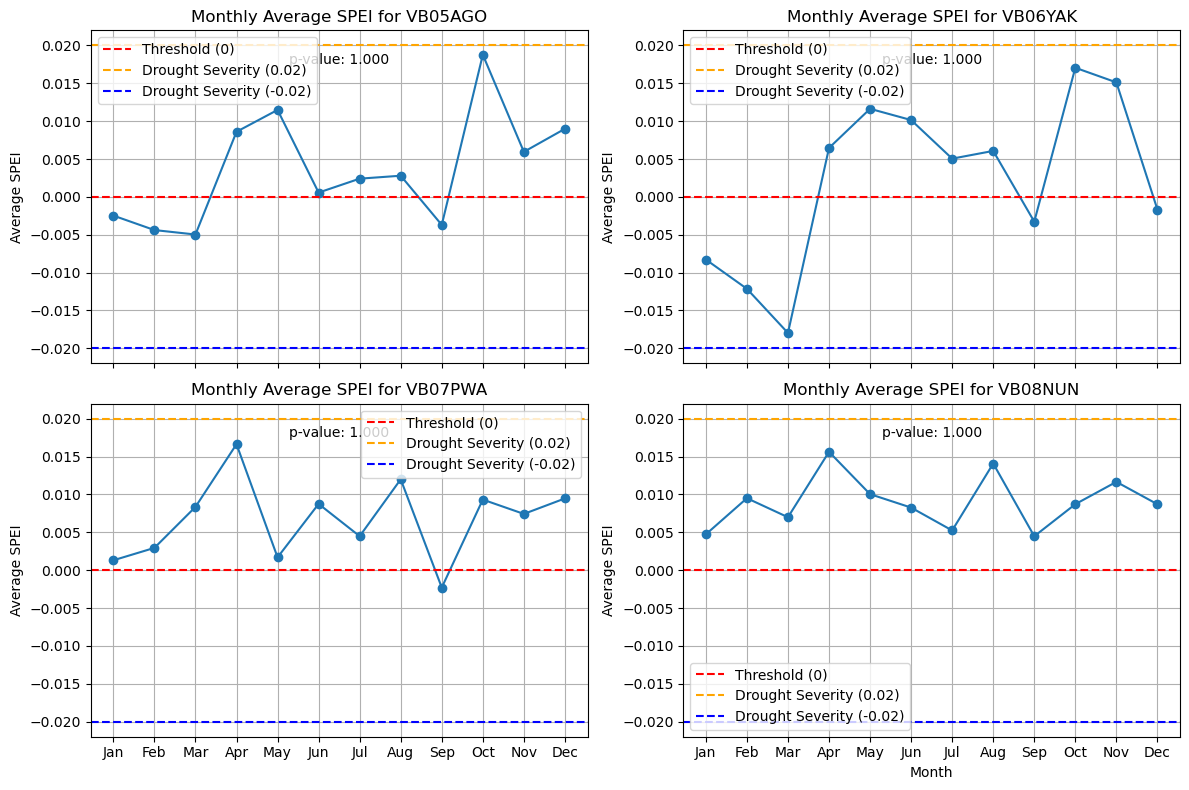

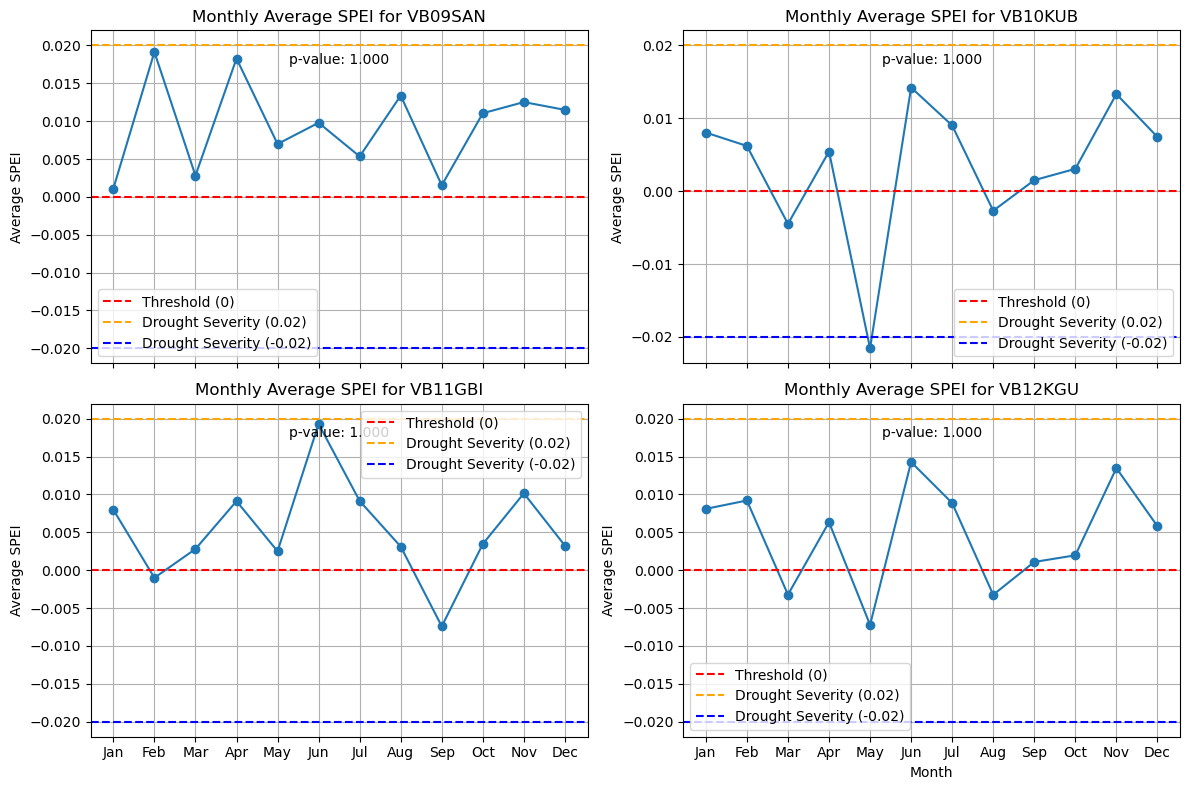

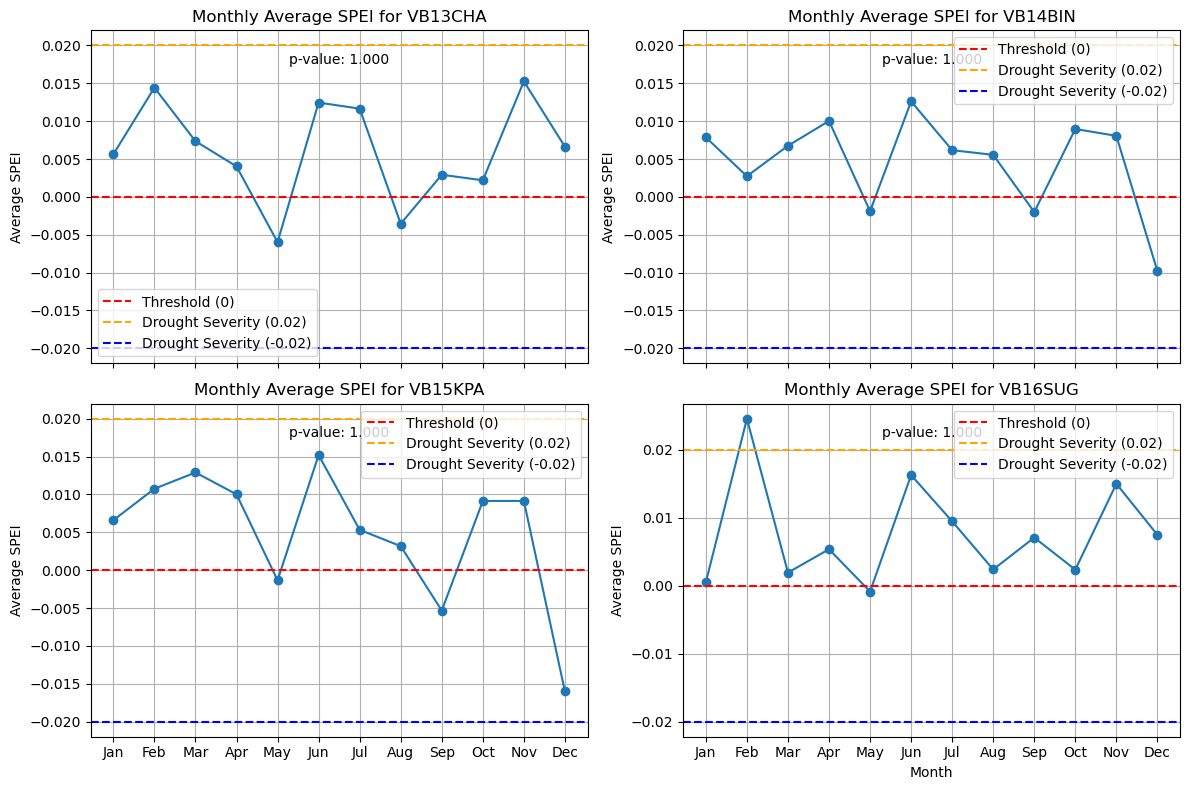

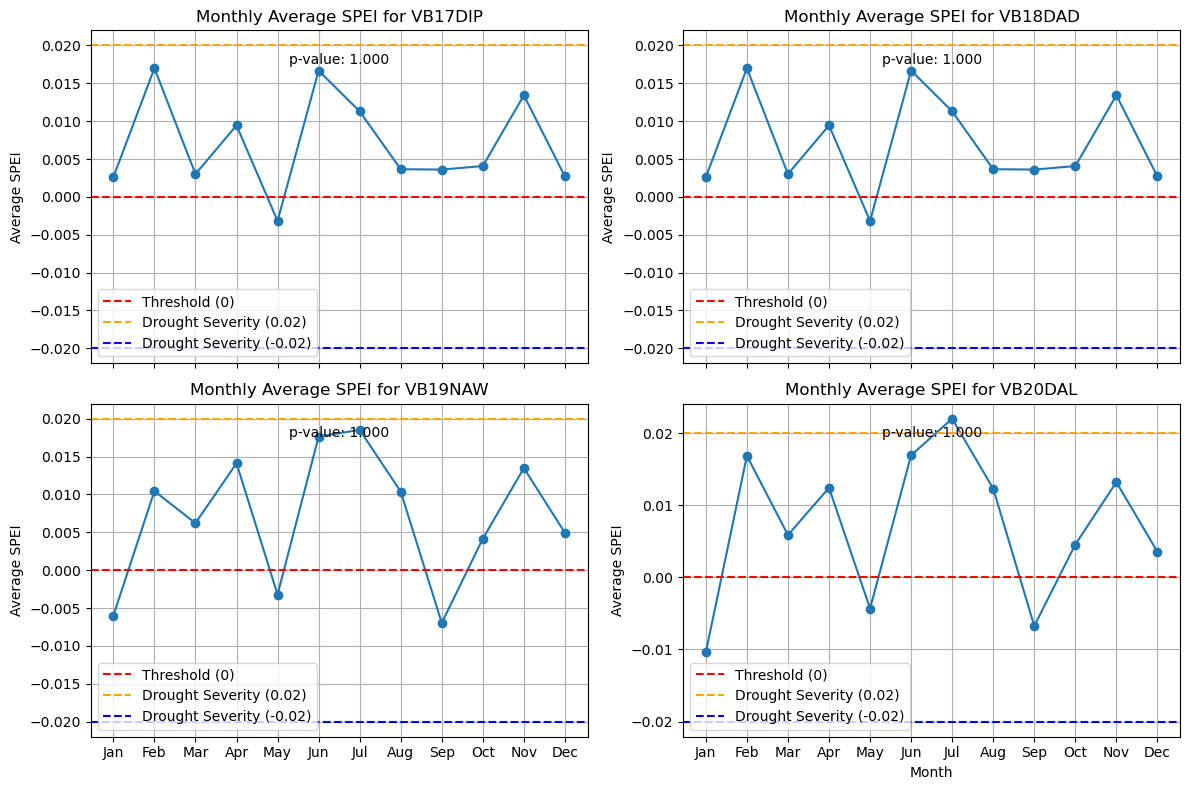

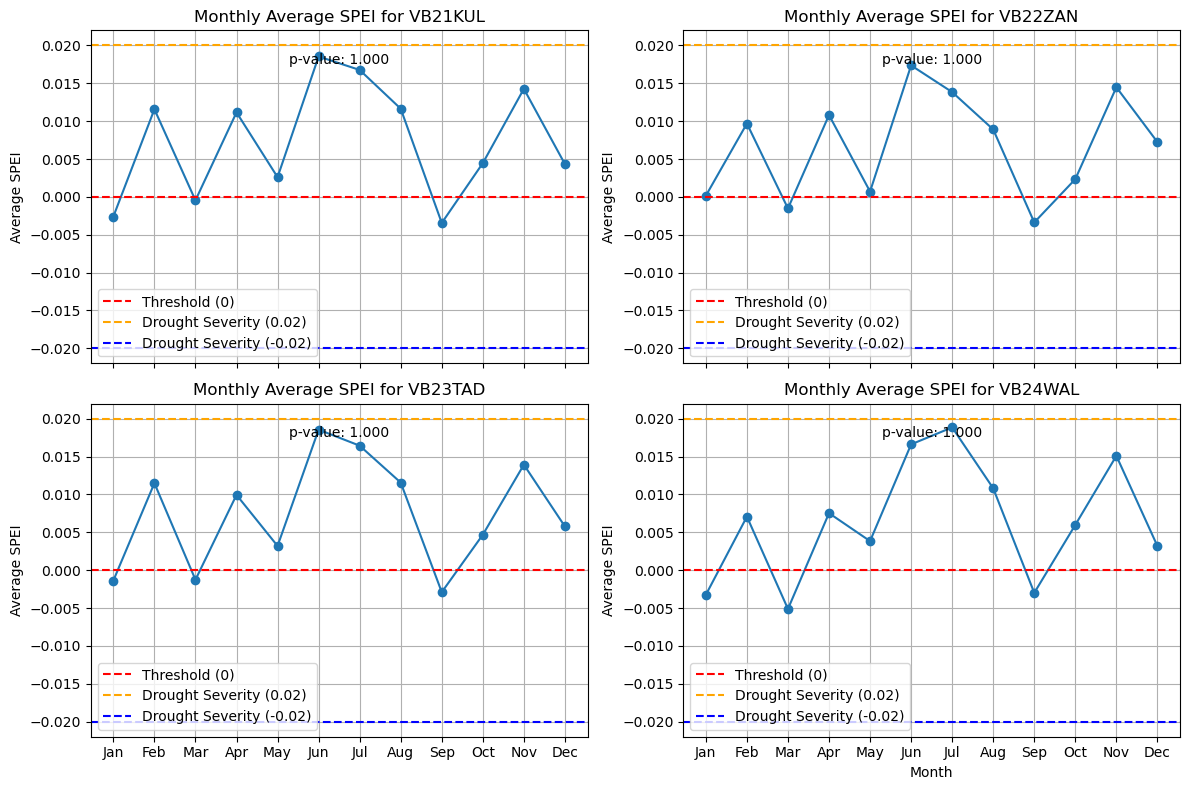

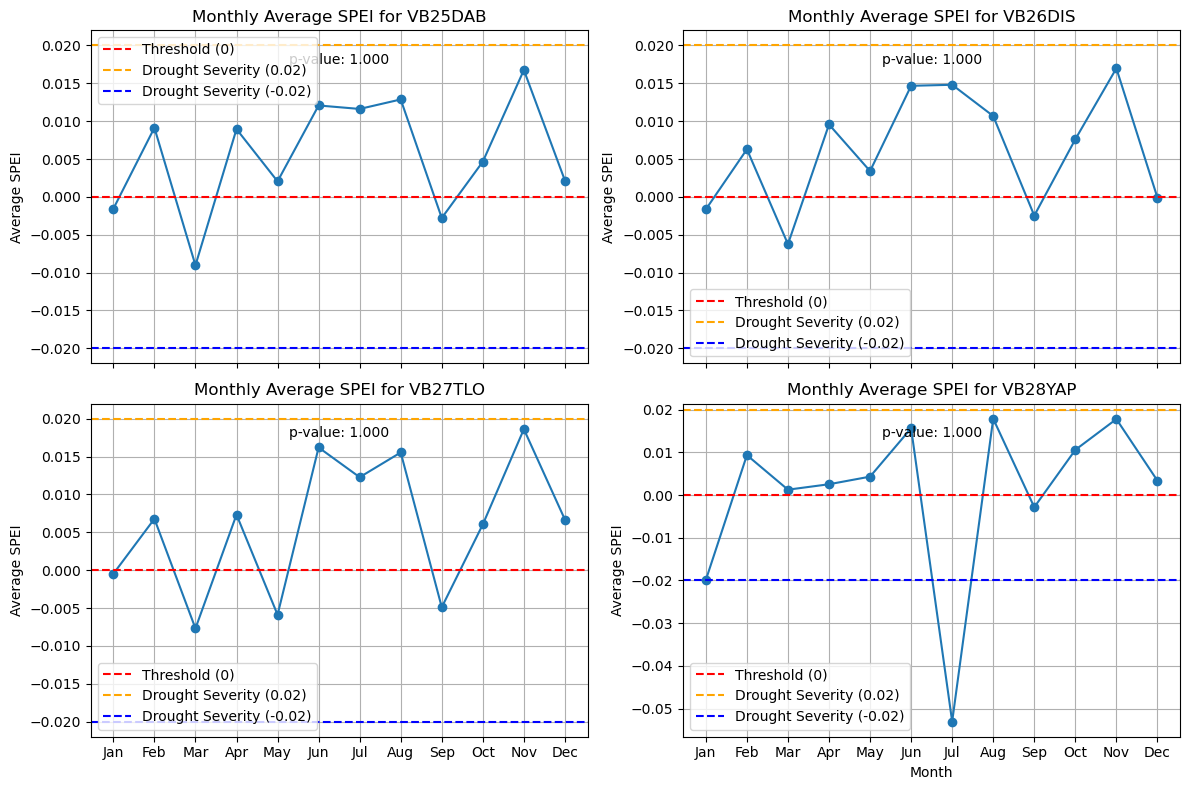

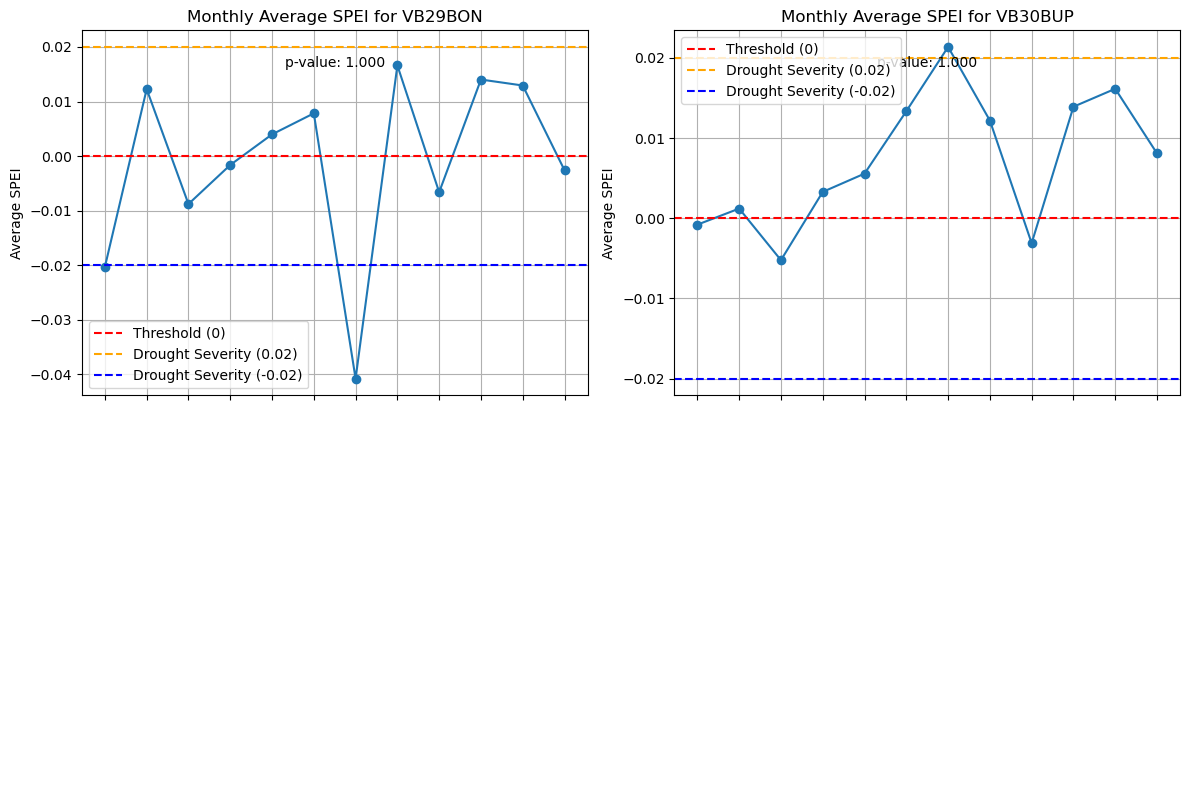

In [1]:

a = pd.read_csv('SPEI_1mon.csv')
a = a[2:].reset_index(drop=True)
a.rename(columns={a.columns[0]: 'DATE'}, inplace=True)
a['DATE'] = pd.to_datetime(a['DATE'], format='%Y%m')
a['Year'] = a['DATE'].dt.year
a['Month'] = a['DATE'].dt.month

location_columns = a.columns[1:31]
num_locations = len(location_columns)
num_cols = 2
num_rows = 2 

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for start in range(0, num_locations, num_cols * num_rows):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True)
    axes = axes.flatten()

    p_values = []

    for i in range(start, min(start + num_cols * num_rows, num_locations)):
        location = location_columns[i]
        monthly_average = a.groupby(['Month'])[location].mean()
        
        # Plotting
        axes[i - start].plot(month_names, monthly_average.values, marker='o')
        axes[i - start].axhline(y=0, color='r', linestyle='--', label='Threshold (0)')
        axes[i - start].axhline(y=0.02, color='orange', linestyle='--', label='Drought Severity (0.02)')
        axes[i - start].axhline(y=-0.02, color='blue', linestyle='--', label='Drought Severity (-0.02)')
        axes[i - start].set_ylabel('Average SPEI')
        axes[i - start].set_title(f'Monthly Average SPEI for {location}')
        axes[i - start].legend()
        axes[i - start].grid()

        # Perform ANOVA test across months
        f_val, p_val = stats.f_oneway(*[group[location].values for name, group in a.groupby('Month')])
        p_values.append(p_val)

        # Add p-value to the plot
        axes[i - start].text(0.5, 0.9, f'p-value: {p_val:.3f}', transform=axes[i - start].transAxes, ha='center', fontsize=10)

    # Hide unused axes
    for j in range(i + 1 - start, num_cols * num_rows):
        axes[j].axis('off')
s
    axes[-1].set_xlabel('Month')

    plt.tight_layout()
    plt.savefig(f'plots_{start // (num_cols * num_rows) + 1}.png', dpi=500)
    plt.show()
